## World Bank Project and Sector Codes Extraction Module
##### Author: Ridwan Bello

Consider this hypothetical (but not unrealistic) scenario.

You are the analyst in charge of the portfolio identification for an Evaluation, say, on Transport Decarbonization. You need to extract the list of all WB lending projects (excluding Addifitonal Financing), approved between FY2010 and FY2020, closed or active, and mapped to Transport sector codes.

You might do this in one of two ways: on Data Explorer or PowerBI (there may be other ways, but these are the two known to me).

On Data Explorer, you would:
1. Download the "Project Sectors" data table.
2. Download the "All projects" data table.
3. Merge the two data tables offline.
4. Then, filter the merged table based on Approval FY, Project status, product type, and sector code.

Limitations:
1. Inefficient. You have to download data you don't need to get to data you need.
2. Computationally demanding. Project Sectors and All projects data tables have hundreds of thousands of rows and over a hundred columns! Working with such large volumes of data tend to slow down the data software you are working with.

On PowerBI, you would:
1. Navigate to the "ssrds_Operations" dataset.
2. Create report from scratch.
3. Drag required variables unto the canvass.
4. Drag filter variables unto the filter panes, and begin to tick or untick relevant categories.
5. Export resulting table to Excel.

Limitation:
1. Manual and potentially tedious, if you have to filter data extract by multiple variables and categories.

In this module helps to address these limitations by:
1. Downloading ALL the project and sector data from PowerBI to IEG N-drive.
2. Providing a platform that allows users to extract data in 3 lines of code (4, users would like to save data extract).

See below.

In [1]:
#Step 1: import the Sectors object from the proj_codes module, and create (an instance of the) Sectors object
from proj_codes import Sectors
demo = Sectors()

Sectors object created.


In [2]:
#Step 2: load data into the Sectors object created
demo.load_data()

Loading WB project sectors data.
This typically takes 1-2 minutes. Please wait...
Data loading successful!
Loaded data contains 193327 rows and 111714 unique WB projects.
Total loading time: 104.2 seconds.
Data source: World Bank Standard Reports.
Data download date: April 14, 2022.


In [6]:
#Step 3: extract the required data
#The get_projects method allows users select projects that meet certain criteria 
projs_to_extract = demo.get_projects(sector_codes=['TI','tw','Tv','TP','TC','TF','TZ'],   #Return projects mapped to these sectors
                                      min_pct=20,                  #Only return projects where any code in sector_codes account for 20% or more
                                      start_FY=2010,               #Only return projects approved after FY2010
                                      stop_FY=2020,                #Only return projects approved before FY2020
                                     product_type=['L'],           #Only return lending projects
                                     project_status=['Active','Closed'],   #Only return closed and active projects
                                     include_AF=False,             #Do not include Additional Financing projects in the output
                                     show_meta=True)               #Show additional projects meta-data

497 unique projects meet the specified criteria.


In [4]:
#Step 4: Save the data extract
demo.save_last("Demo_data_1")

Data extract saved.


This is the basic functionality of the module: extracting portfolio data from in a concise and efficient manner.

However, this module has other functionalities that allow users quickly explore the data they have extracted. For example, you could plot the data extract by the key variables (e.g., by sectors, region, approval FY, lending instrument (obviously works for lending projects only), completion status, and lead GP.

See below.

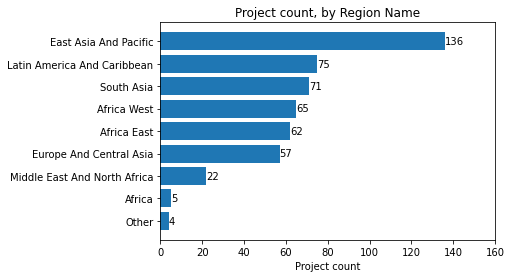

In [7]:
demo.plot_last("region")

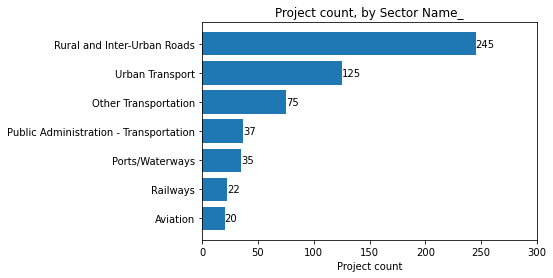

In [8]:
demo.plot_last("sectors")      #Note that sector mapping are not mutually exclusive

Plot saved.


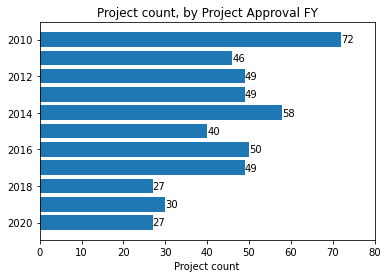

In [9]:
demo.plot_last("fy", save_name = "FY_plot")

Plot saved.


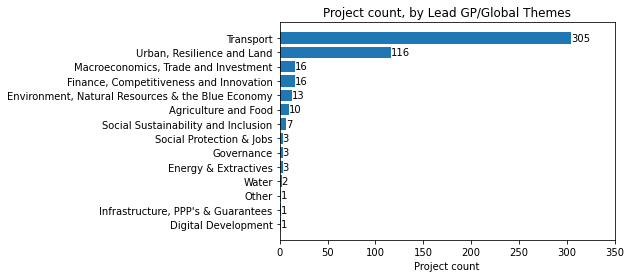

In [10]:
#Users can specify the save_name argument to save the plot created  
demo.plot_last("gp", save_name="demo_plot")

Let's consider the reverse scenario.

Suppose you have a list of projects you have already identified, but you are now just interested in identifying the sectors that these projects are mapped to. Again, to do this, you would have to download the full data from the usual sources, then begin to filter for the projects of interest to you (or do a VLOOKUP in excel).

This module let's you do that as well. See below.

In [11]:
#Suppose you are interested in the sector codes of these 3 PIDs
test_pids = ['P055120', 'P072644', 'P079414']

In [12]:
#The get_sectors function accepts a list of pids and return the sectors that those pids are mapped to
projs_to_extract_2 = demo.get_sectors(test_pids, show_meta=True)

Data found for 3 out of 3 requested PIDs.


In [13]:
#The save_last function also accept an optional argument to specify the name the extract should be saved with. See below.
demo.save_last("sectors for PIDs")

Data extract saved.


For more on the full functionalities of the Sectors class, users can check the documentation. 

In [14]:
help(Sectors)

Help on class Sectors in module proj_codes:

class Sectors(builtins.object)
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      Description
 |      -------
 |      Boolean representation of a Sectors object.
 |      Returns True if data has been loaded to a Sectors object.
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Description
 |      -------
 |      String representation of a Sectors object.
 |  
 |  copy_data(self)
 |      Description
 |      ----------
 |      Returns a copy of the DataFrame, if any, that has been loaded into the data attribute of a Sectors object.
 |      Supports variable assignment.
 |      
 |      Parameters
 |      ----------
 |      None
 |      
 |      Returns
 |      ----------
 |      DataFrame object
 |  
 |  count_sectors(self, pid_list, summarize=False)
 |      Description
 |      ----------
 |      Returns the number of sub-sectors that the specified projects are 

The proj_codes module provide similar functionality for working with WB Theme codes. The syntax for workingwith Theme codes is to that of sector codes, except for replacing "sectors" with "themes". See below:

In [14]:
#Import the Class Themes (instead of Sectors) and create an instance of the object
from proj_codes import Themes
demo2 = Themes()

Themes object created.


In [15]:
#Load data into the Themes object created. Note that the syntax is the same with the Sectors class
demo2.load_data()

Loading WB project Themes data.
This typically takes 2-4 minutes. Please wait...
Data loading successful!
Loaded data contains 683696 rows and 111714 unique WB projects.
Total loading time: 206.1 seconds.
Data source: World Bank Standard Reports.
Data download date: April 14, 2022.


In [16]:
#Suppose you are interested in the theme codes of these 3 PIDs
test_pids = ['P055120', 'P072644', 'P079414']

#The get_themes functions accepts a list of PIDs and returns the themes that those PIDs are mapped to
themes_extract = demo2.get_themes(test_pids, theme_level=[3], show_meta=True)

Data found for 3 out of 3 requested projects.


In [17]:
#On the contrary, the get_projects accepts a list of theme codes and returns the projects mapped to those themes.
#Suppose user is interested in extracting project mapped to theme codes 811 and 812
test_themes = [811, 812]

#The get_themes functions accepts a list of PIDs and returns the themes that those PIDs are mapped to
project_extract = demo2.get_projects(theme_codes = [811, 812],
                                    min_pct=80,
                                    start_FY=2010,
                                    stop_FY=2020,
                                    product_type=['L'],
                                    project_status=['Closed'],
                                    include_AF=False,
                                    show_meta=True,
                                    show_all=True)

170 unique projects meet the specified criteria..


As with the Sectors class, users can call .save_last() to save the extracted data to their local drives and the .plot_last() to plot the extracted data. As with the Sectors class, users can check the documentation to view the full functionality of the Themes class. 

In [18]:
help(Themes)

Help on class Themes in module proj_codes:

class Themes(builtins.object)
 |  Methods defined here:
 |  
 |  __bool__(self)
 |      Description
 |      -------
 |      Boolean representation of a Themes object.
 |      Returns True if data has been loaded to a Themes object.
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Description
 |      -------
 |      String representation of a Themes object.
 |  
 |  copy_data(self)
 |      Description
 |      ----------
 |      Returns a copy of the DataFrame, if any, that has been loaded into the data attribute of a WBTheme object.
 |      Supports variable assignment.
 |      
 |      Parameters
 |      ----------
 |      None
 |      
 |      Returns
 |      ----------
 |      DataFrame object
 |  
 |  data_info(self)
 |      Description
 |      ----------
 |      Prints summary information on the DataFrame, if any, that has been loaded into the data attribute of a